In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os.path as osp
from PIL import Image

import torchvision.datasets as dset
import torchvision.transforms as T
import chest_xray_code.data.xrays as preprocess_dataset
import chest_xray_code.data.raw_reports as utils
import os
import torch.nn.functional as F
from models.NewConvModel import NewConvNet 
from models.TestConvNet import TestConvNet
from loaders.XrayLoader import XrayLoader
from loaders.BloodCellLoader import BloodCellLoader
from loaders.BloodCellLoader256 import BloodCellLoader256
from loaders.MuseumLoader import MuseumLoader
from loaders.MuseumLoader256 import MuseumLoader256

import numpy as np

In [2]:
xray_set = XrayLoader(
    root='chest_xray_code/data/xrays',
    preload=False, transform=transforms.ToTensor(),
)
xray_loader = DataLoader(xray_set, batch_size=20, shuffle=False, num_workers=32)

blood_set = BloodCellLoader(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
)

blood_cell_loader = DataLoader(blood_set, batch_size=20, shuffle=False, num_workers=32)

blood_set256 = BloodCellLoader256(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
)

blood_cell_loader256 = DataLoader(blood_set256, batch_size=20, shuffle=False, num_workers=32)

museum_set = MuseumLoader(
    root='museum_data/dataset_updated/validation_set',
    preload=False, transform=transforms.ToTensor(),
)

museum_loader = DataLoader(museum_set, batch_size=20, shuffle=False, num_workers=32)


museum_set256 = MuseumLoader256(
    root='museum_data/dataset_updated/validation_set',
    preload=False, transform=transforms.ToTensor(),
)

museum_loader256 = DataLoader(museum_set256, batch_size=20, shuffle=False, num_workers=32)

print(len(museum_set))
print(len(museum_set256))

20
20


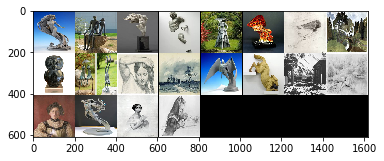

In [3]:
def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    img = img.numpy()
    
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 2 * (img - img_min) / (img_max - img_min)
    
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.savefig('compressed.png')
    
    # functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.savefig('original.png')

# get some random training images
dataiter = iter(museum_loader)
images = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [4]:
class ConvNet16(nn.Module):
    def __init__(self,channels,size,device):
        super().__init__()

        self.conv_1_compress = nn.Conv2d(channels, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.relu_1_compress = nn.ReLU()
        
        self.conv_2_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_2_compress = nn.BatchNorm2d(size)
        self.relu_2_compress = nn.ReLU()
        
        self.conv_3_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_3_compress = nn.BatchNorm2d(size)
        self.relu_3_compress = nn.ReLU()
        
        self.conv_4_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_4_compress = nn.BatchNorm2d(size)
        self.relu_4_compress = nn.ReLU()
        
        self.conv_5_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_5_compress = nn.BatchNorm2d(size)
        self.relu_5_compress = nn.ReLU()
        
        self.conv_6_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_6_compress = nn.BatchNorm2d(size)
        self.relu_6_compress = nn.ReLU()

        self.conv_downsize_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_downsize_compress = nn.BatchNorm2d(size)
        self.relu_downsize_compress = nn.ReLU()
        
        self.conv_7_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_7_compress = nn.BatchNorm2d(size)
        self.relu_7_compress = nn.ReLU()
        
        self.conv_8_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_8_compress = nn.BatchNorm2d(size)
        self.relu_8_compress = nn.ReLU()
        
        self.conv_9_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_9_compress = nn.BatchNorm2d(size)
        self.relu_9_compress = nn.ReLU()
        
        self.conv_10_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_10_compress = nn.BatchNorm2d(size)
        self.relu_10_compress = nn.ReLU()
        
        self.conv_11_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_11_compress = nn.BatchNorm2d(size)
        self.relu_11_compress = nn.ReLU()
        
        self.conv_12_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_12_compress = nn.BatchNorm2d(size)
        self.relu_12_compress = nn.ReLU()
        
        self.conv_13_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_13_compress = nn.BatchNorm2d(size)
        self.relu_13_compress = nn.ReLU()
        
        
        self.conv_compress_final = nn.Conv2d(size, channels, kernel_size=3,stride=1,padding=1,bias=True)
        
        self.upscaling = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_1_decompress = nn.Conv2d(channels, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.relu_1_decompress = nn.ReLU()
        
        self.conv_2_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_2_decompress = nn.BatchNorm2d(size)
        self.relu_2_decompress = nn.ReLU()
        
        self.conv_3_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_3_decompress = nn.BatchNorm2d(size)
        self.relu_3_decompress = nn.ReLU()
        
        self.conv_4_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_4_decompress = nn.BatchNorm2d(size)
        self.relu_4_decompress = nn.ReLU()
        
        self.upscaling2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_5_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_5_decompress = nn.BatchNorm2d(size)
        self.relu_5_decompress = nn.ReLU()
        
        self.conv_6_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_6_decompress = nn.BatchNorm2d(size)
        self.relu_6_decompress = nn.ReLU()
        
        self.conv_7_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_7_decompress = nn.BatchNorm2d(size)
        self.relu_7_decompress = nn.ReLU()
        
        self.conv_8_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_8_decompress = nn.BatchNorm2d(size)
        self.relu_8_decompress = nn.ReLU()
        
        self.upscaling3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_9_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_9_decompress = nn.BatchNorm2d(size)
        self.relu_9_decompress = nn.ReLU()
        
        self.conv_10_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_10_decompress = nn.BatchNorm2d(size)
        self.relu_10_decompress = nn.ReLU()
        
        self.conv_11_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_11_decompress = nn.BatchNorm2d(size)
        self.relu_11_decompress = nn.ReLU()
        
        self.conv_12_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_12_decompress = nn.BatchNorm2d(size)
        self.relu_12_decompress = nn.ReLU()
        
        self.upscaling4 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_13_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_13_decompress = nn.BatchNorm2d(size)
        self.relu_13_decompress = nn.ReLU()
        
        self.conv_14_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_14_decompress = nn.BatchNorm2d(size)
        self.relu_14_decompress = nn.ReLU()
        
        self.conv_15_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_15_decompress = nn.BatchNorm2d(size)
        self.relu_15_decompress = nn.ReLU()
        
        self.conv_16_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_16_decompress = nn.BatchNorm2d(size)
        self.relu_16_decompress = nn.ReLU()
        
        self.conv_17_decompress = nn.Conv2d(size, 3, kernel_size=3,stride=1,padding=1,bias=True)
        

    def forward(self, x):
        scores = None
        model = torch.nn.Sequential( 
            
            self.conv_1_compress,
            self.relu_1_compress,
        
            self.conv_2_compress,
            self.batchnorm_2_compress,
            self.relu_2_compress,
            
            self.conv_3_compress,
            self.batchnorm_3_compress,
            self.relu_3_compress,
            
            self.conv_4_compress,
            self.batchnorm_4_compress,
            self.relu_4_compress,
            
            self.conv_5_compress,
            self.batchnorm_5_compress,
            self.relu_5_compress,
            
            self.conv_6_compress,
            self.batchnorm_6_compress,
            self.relu_6_compress,
            
            self.conv_downsize_compress,
            self.batchnorm_downsize_compress,
            self.relu_downsize_compress,
            
            self.conv_7_compress,
            self.batchnorm_7_compress,
            self.relu_7_compress,
            
            self.conv_8_compress,
            self.batchnorm_8_compress,
            self.relu_8_compress,
            
            self.conv_9_compress,
            self.batchnorm_9_compress,
            self.relu_9_compress,
            
            self.conv_10_compress,
            self.batchnorm_10_compress,
            self.relu_10_compress,
            
            self.conv_11_compress,
            self.batchnorm_11_compress,
            self.relu_11_compress,
            
            self.conv_12_compress,
            self.batchnorm_12_compress,
            self.relu_12_compress,
            
            self.conv_13_compress,
            self.batchnorm_13_compress,
            self.relu_13_compress,
            
            self.conv_compress_final,
        
            self.upscaling,
            
            self.conv_1_decompress,
            self.relu_1_decompress,
        
            self.conv_2_decompress,
            self.batchnorm_2_decompress,
            self.relu_2_decompress,
            
            self.conv_3_decompress,
            self.batchnorm_3_decompress,
            self.relu_3_decompress,
            
            self.conv_4_decompress,
            self.batchnorm_4_decompress,
            self.relu_4_decompress,
            
            self.upscaling2,
            
            self.conv_5_decompress,
            self.batchnorm_5_decompress,
            self.relu_5_decompress,
            
            self.conv_6_decompress,
            self.batchnorm_6_decompress,
            self.relu_6_decompress,
            
            self.conv_7_decompress,
            self.batchnorm_7_decompress,
            self.relu_7_decompress,
            
            self.conv_8_decompress,
            self.batchnorm_8_decompress,
            self.relu_8_decompress,
            
            self.upscaling3,
            
            self.conv_9_decompress,
            self.batchnorm_9_decompress,
            self.relu_9_decompress,
            
            self.conv_10_decompress,
            self.batchnorm_10_decompress,
            self.relu_10_decompress,
            
            self.conv_11_decompress,
            self.batchnorm_11_decompress,
            self.relu_11_decompress,
            
            self.conv_12_decompress,
            self.batchnorm_12_decompress,
            self.relu_12_decompress,
            
            self.upscaling4,
        
            self.conv_13_decompress,
            self.batchnorm_13_decompress,
            self.relu_13_decompress,
            
            self.conv_14_decompress,
            self.batchnorm_14_decompress,
            self.relu_14_decompress,
            
            self.conv_15_decompress,
            self.batchnorm_15_decompress,
            self.relu_15_decompress,
            
            self.conv_16_decompress,
            self.batchnorm_16_decompress,
            self.relu_16_decompress,
            
            self.conv_17_decompress

            
        ).to(device)
        scores = model(x)
        return scores

In [5]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    #dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 5


# Architecture

In [6]:
def train(model, epoch, log_interval=100):
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    model = torch.nn.DataParallel(model)
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        for batch_idx, (data) in enumerate(trainset_loader):
            data = data.to(device=device, dtype=dtype)
            optimizer.zero_grad()
            #print(data.shape)
            reconstruction = model(data)
            loss_function = nn.MSELoss(size_average=True)
            loss = loss_function(reconstruction, data)
            loss.backward()
            optimizer.step()
        if ep % print_every == 0:
            print('Iteration %d, loss = %.4f' % (ep, loss.item()))
            print()

def test():
    model.eval()  # set evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data in testset_loader:
            data = data.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testset_loader.dataset)
    print('\nTest set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testset_loader.dataset),
        100. * correct / len(testset_loader.dataset)))
    

In [7]:
channels = 3
size = 32
model100 = TestConvNet(channels,size)
model100.load_state_dict(torch.load('old_museum.pt'))
model50 = NewConvNet(channels,size,device)
model50.load_state_dict(torch.load('new_museum.pt'))
model16 = torch.load('museum256.pt')

/home/shared/anaconda3/lib/python3.6/site-packages/torch/serialization.py:333: UserWarning: Couldn't retrieve source code for container of type ConvNet16. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


Visualize the Compressed images 

In [8]:
#model = torch.load('trained_models/xraymodelV2.pt')

plt.close("all")


all_images = [[],[],[],[]]

def prep(img):
    img = img.numpy()
    if True:
        img_max, img_min = np.max(img), np.min(img)
        img = (img - img_min) / (img_max - img_min) 
    return np.transpose(img, (1, 2, 0)) 
    
def save_compressed(self,input,output):
    #for i in range(1):
    img = output.cpu().detach()
    for i in range(img.shape[0]):
        individual_img = img[i]
        all_images[1].append(prep(individual_img))

def save_original_and_jpeg(data,path,q):
    img = data.cpu().detach()

    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        all_images[0].append(individual_img) #append original

        rescaled = (255.0 * individual_img)
        rescaled = rescaled.astype('uint8')
        
        PIL_img = Image.fromarray(rescaled)
        jpeg_filename =  path +"/"+ str(i) + "jpeg.jpeg"
        PIL_img.save(jpeg_filename,"JPEG",quality=q)
     
        jpeg_compressed = Image.open(jpeg_filename)
        jpeg_compressed = np.asarray(jpeg_compressed)
        #jpeg_compressed = np.transpose(jpeg_compressed,(1,2,0))
        all_images[3].append(jpeg_compressed) #append jpeg

def save_reconstructed(r):
    r = r.cpu().detach()
    
    for i in range(r.shape[0]):
        individual_img = r[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        individual_img = np.clip(individual_img,0,1)
        all_images[2].append(individual_img)
        

def save_original(data):
    img = data.cpu().detach()
    
    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        all_images[0].append(individual_img)


#hook.remove()
def save_from_numpy(img,file_path):
    img = 255.0 * img
    img = img.astype('uint8')
    if img.shape[2] != 3:
        img = np.transpose(img,(1,2,0))
    img = Image.fromarray(img)
    img.save(file_path)



def visualize(dataset_loader,model,file_path,quality):
    i = 0
    print("hello")
    
    hook = model.conv_compress_final.register_forward_hook(save_compressed)
    
    avg_psnr_rec = 0.0
    avg_psnr_jpeg = 0.0
    
    reconstruction = None
    print("iterating through dataset")
    for data in dataset_loader:
        with torch.no_grad():
            if i > 0: break
            data = data.to(device)
            save_original_and_jpeg(data,file_path,quality)
            reconstruction = model(data)
            save_reconstructed(reconstruction)
            i+=1

    for i in range(20):
        plt.figure()
        org = all_images[0][i]
        print(org.shape)
        save_from_numpy(org,file_path+"/"+str(i)+"org.png")
        plt.subplot(1, 4, 1)
        plt.axis('off')
        #imshow_noax(org, normalize=False)
        plt.imshow(org)
        plt.title('Original')
        plt.subplot(1, 4, 2)
        com = all_images[1][i]
        plt.imshow(com)
        save_from_numpy(com,file_path+"/"+str(i)+"com.png")
        print(com.shape)
        #imshow_noax(rec, normalize=False)
        plt.title('Compressed')
        plt.axis('off')
        plt.subplot(1, 4, 3)
        recon = all_images[2][i]
        print(recon.shape)
        save_from_numpy(recon,file_path+"/"+str(i)+"recon.png")
        plt.axis('off')
        plt.imshow(recon)
        plt.title('Reconstructed')
        plt.subplot(1, 4, 4)
        jpg = all_images[3][i]
        #save_from_numpy(jpg,file_path+"/"+str(i)+"jpg.png")
        print(jpg.shape)
        plt.axis('off')
        plt.imshow(jpg)
        plt.title('JPG')
        plt.show()
        
        mserec = np.sum((org - recon)**2) / (org.shape[0]**2)
        psnr = -10*np.log10(mserec)
        avg_psnr_rec += psnr
        print('image%s reconstruction PSNR: %s' % (i,psnr))
        msejpeg = np.sum((org - jpg/255.0)**2) / (org.shape[0]**2)
        psnr = -10*np.log10(msejpeg)
        avg_psnr_jpeg += psnr
        print('image%s jpeg PSNR: %s' % (i,psnr))
        
    avg_psnr_rec = avg_psnr_rec/20
    avg_psnr_jpeg = avg_psnr_jpeg/20
    print('')
    print('Average reconstruction PSNR: %s' % avg_psnr_rec)
    print('Average JPEG PSNR: %s' % avg_psnr_jpeg)   
    print('')
        



Visualize the Reconstructed Images

hello
iterating through dataset
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


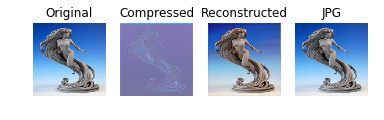

image0 reconstruction PSNR: 19.91234774127641
image0 jpeg PSNR: 41.40712314356403
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


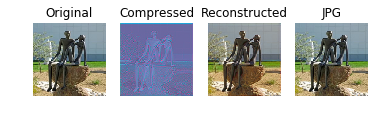

image1 reconstruction PSNR: 22.15622508400267
image1 jpeg PSNR: 42.882106032823266
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


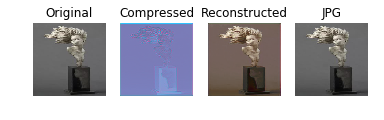

image2 reconstruction PSNR: 21.592730575543975
image2 jpeg PSNR: 50.309840952191635
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


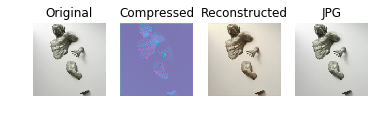

image3 reconstruction PSNR: 23.941355791980072
image3 jpeg PSNR: 51.802182677550974
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


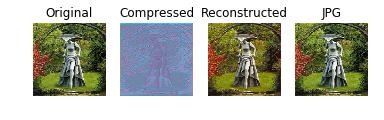

image4 reconstruction PSNR: 19.410700397768807
image4 jpeg PSNR: 40.24551419137285
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


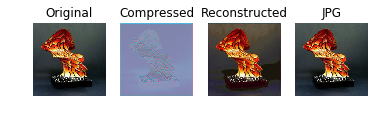

image5 reconstruction PSNR: 20.487942145474413
image5 jpeg PSNR: 35.96633378666836
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


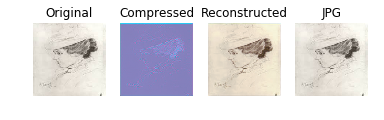

image6 reconstruction PSNR: 23.22024914323857
image6 jpeg PSNR: 52.36739020581864
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


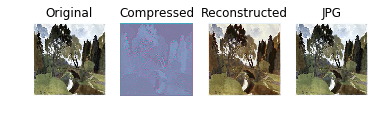

image7 reconstruction PSNR: 20.93866612890737
image7 jpeg PSNR: 41.82088371610397
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


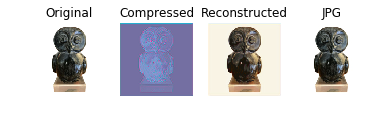

image8 reconstruction PSNR: 20.008372422002907
image8 jpeg PSNR: 43.30782166522104
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


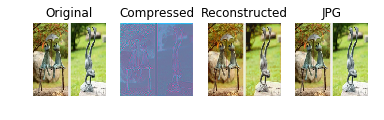

image9 reconstruction PSNR: 21.258001033423255
image9 jpeg PSNR: 37.880716303255056
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


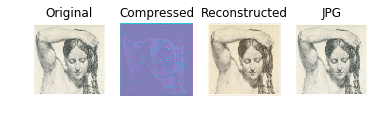

image10 reconstruction PSNR: 22.40182876106045
image10 jpeg PSNR: 46.465096091678866
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


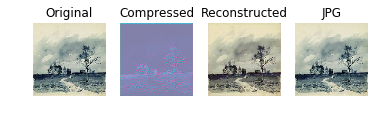

image11 reconstruction PSNR: 22.584946965317467
image11 jpeg PSNR: 44.38309176796402
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


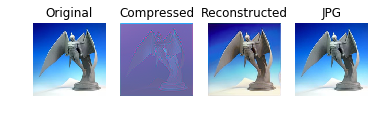

image12 reconstruction PSNR: 18.660577258976804
image12 jpeg PSNR: 40.60976193082497
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


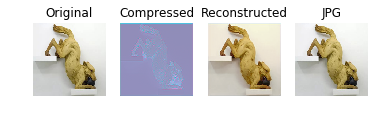

image13 reconstruction PSNR: 22.09101022846262
image13 jpeg PSNR: 44.5699229146582
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


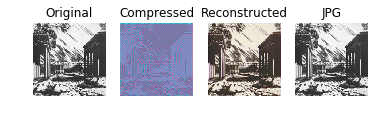

image14 reconstruction PSNR: 20.297519269492344
image14 jpeg PSNR: 53.86813214333847
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


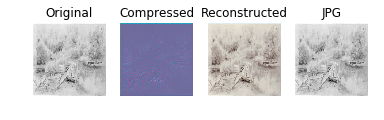

image15 reconstruction PSNR: 24.265204771984187
image15 jpeg PSNR: 53.81475324626868
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


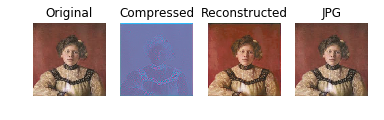

image16 reconstruction PSNR: 21.484211627301846
image16 jpeg PSNR: 43.76218274102237
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


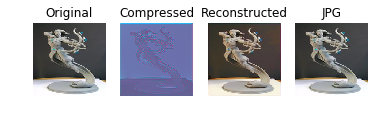

image17 reconstruction PSNR: 22.62407002324345
image17 jpeg PSNR: 44.003888625897325
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


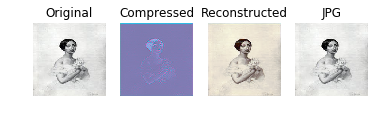

image18 reconstruction PSNR: 21.807792415579176
image18 jpeg PSNR: 51.143710039852685
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


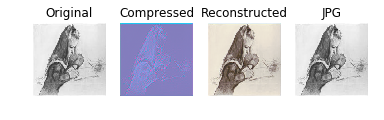

image19 reconstruction PSNR: 21.90155118045889
image19 jpeg PSNR: 54.19768470155083

Average reconstruction PSNR: 21.55226514827478
Average JPEG PSNR: 45.7404068438813

hello
iterating through dataset
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


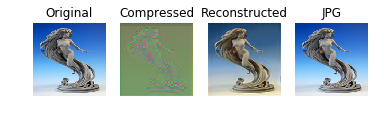

image0 reconstruction PSNR: 13.429639696329662
image0 jpeg PSNR: 35.95892638010846
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


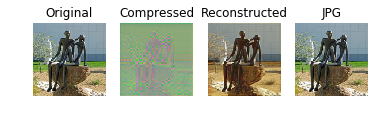

image1 reconstruction PSNR: 16.973694025160857
image1 jpeg PSNR: 35.56875117474045
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


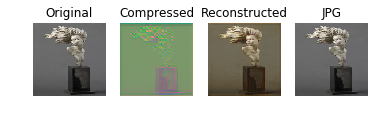

image2 reconstruction PSNR: 18.90504885772384
image2 jpeg PSNR: 42.48991565411436
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


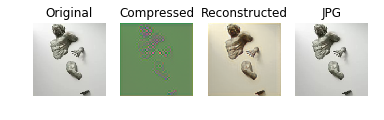

image3 reconstruction PSNR: 17.52035681793008
image3 jpeg PSNR: 42.79851829051981
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


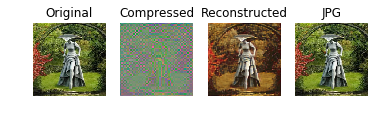

image4 reconstruction PSNR: 15.01991144369044
image4 jpeg PSNR: 33.430931243021675
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


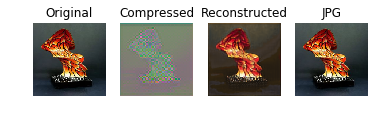

image5 reconstruction PSNR: 15.863724989312356
image5 jpeg PSNR: 33.27249306749064
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


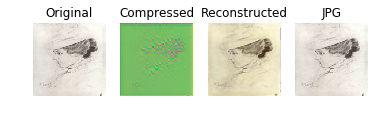

image6 reconstruction PSNR: 17.744783967685773
image6 jpeg PSNR: 41.94925039076293
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


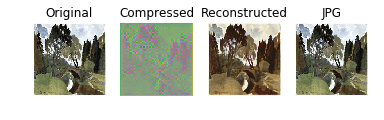

image7 reconstruction PSNR: 16.334531035250933
image7 jpeg PSNR: 35.261991214183645
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


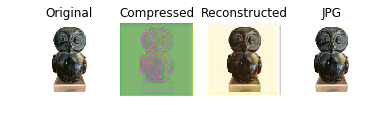

image8 reconstruction PSNR: 16.902737869652224
image8 jpeg PSNR: 37.34780358458307
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


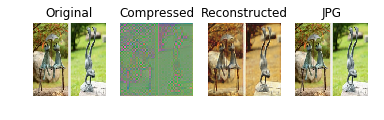

image9 reconstruction PSNR: 15.79855466318687
image9 jpeg PSNR: 33.33897127203671
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


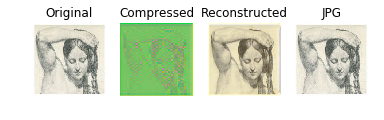

image10 reconstruction PSNR: 17.483006019034967
image10 jpeg PSNR: 38.29945939550892
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


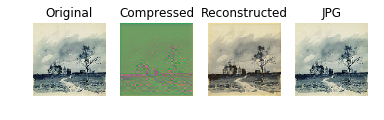

image11 reconstruction PSNR: 17.528292810239407
image11 jpeg PSNR: 37.571814860786816
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


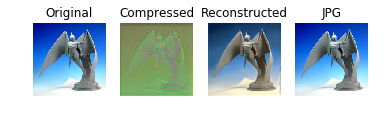

image12 reconstruction PSNR: 12.632769249898475
image12 jpeg PSNR: 35.609223951586706
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


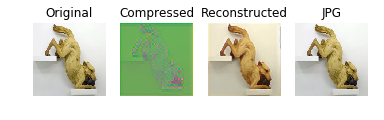

image13 reconstruction PSNR: 17.81796939980555
image13 jpeg PSNR: 37.62036898372121
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


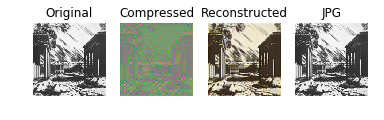

image14 reconstruction PSNR: 14.277250784642687
image14 jpeg PSNR: 38.463204939860276
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


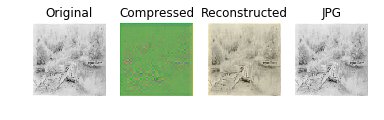

image15 reconstruction PSNR: 17.189798865702915
image15 jpeg PSNR: 39.896110300882754
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


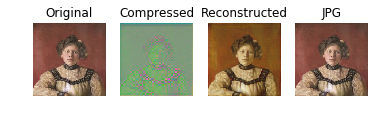

image16 reconstruction PSNR: 17.766522982598953
image16 jpeg PSNR: 37.3113027014928
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


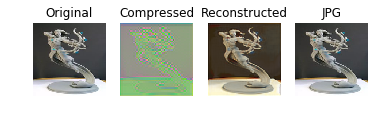

image17 reconstruction PSNR: 17.506939843259023
image17 jpeg PSNR: 38.627288843263095
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


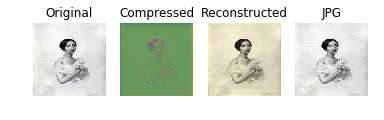

image18 reconstruction PSNR: 16.7315754636292
image18 jpeg PSNR: 41.63458349339605
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


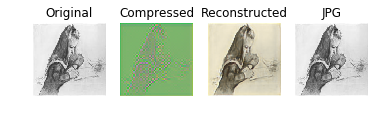

image19 reconstruction PSNR: 16.88254802369751
image19 jpeg PSNR: 40.61593411084548

Average reconstruction PSNR: 16.515482840421583
Average JPEG PSNR: 37.853342192645286

hello
iterating through dataset
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


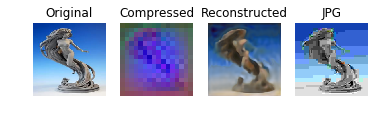

image0 reconstruction PSNR: 9.884911459836605
image0 jpeg PSNR: 16.760105390805712
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


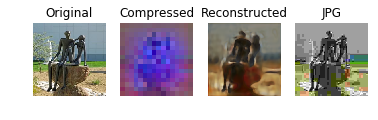

image1 reconstruction PSNR: 10.854770604596437
image1 jpeg PSNR: 15.46573848662029
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


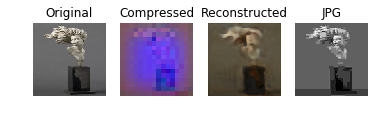

image2 reconstruction PSNR: 13.11578429265733
image2 jpeg PSNR: 19.883416610733043
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


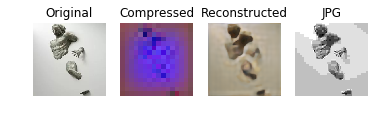

image3 reconstruction PSNR: 9.425242727116235
image3 jpeg PSNR: 19.84090894765227
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


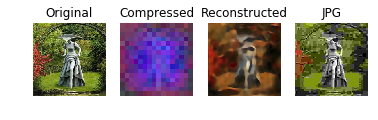

image4 reconstruction PSNR: 10.82868859941729
image4 jpeg PSNR: 14.15367608852743
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


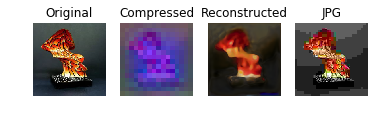

image5 reconstruction PSNR: 12.017387492560854
image5 jpeg PSNR: 15.757120082414486
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


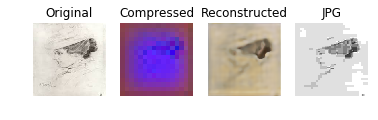

image6 reconstruction PSNR: 8.978897430756787
image6 jpeg PSNR: 20.30660220512308
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


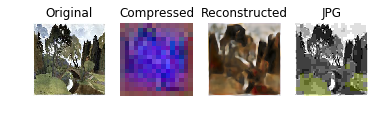

image7 reconstruction PSNR: 10.020604134240738
image7 jpeg PSNR: 15.002711820885795
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


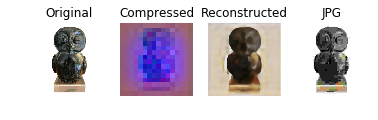

image8 reconstruction PSNR: 8.95095113766168
image8 jpeg PSNR: 19.250349365593664
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


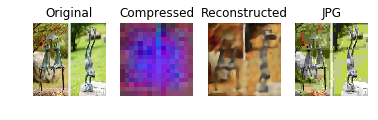

image9 reconstruction PSNR: 10.132436313292652
image9 jpeg PSNR: 14.886737382589867
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


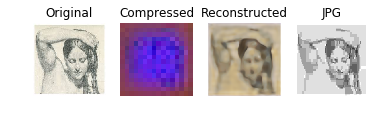

image10 reconstruction PSNR: 9.30037678522522
image10 jpeg PSNR: 18.075003935693843
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


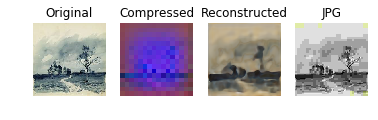

image11 reconstruction PSNR: 10.356074733082483
image11 jpeg PSNR: 16.56629804092523
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


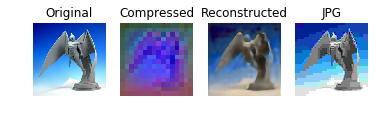

image12 reconstruction PSNR: 9.215992253996639
image12 jpeg PSNR: 16.950117860037636
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


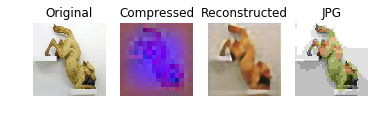

image13 reconstruction PSNR: 9.83342783364554
image13 jpeg PSNR: 17.945688172031467
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


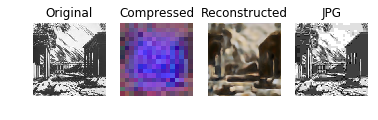

image14 reconstruction PSNR: 8.20264000281529
image14 jpeg PSNR: 14.093363040309214
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


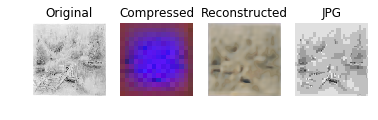

image15 reconstruction PSNR: 9.631646312363847
image15 jpeg PSNR: 18.78467915927061
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


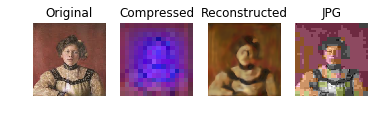

image16 reconstruction PSNR: 13.527110241364657
image16 jpeg PSNR: 15.751548021969912
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


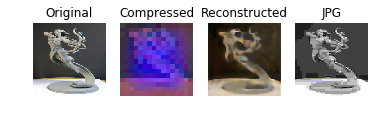

image17 reconstruction PSNR: 10.895034163155755
image17 jpeg PSNR: 17.97127789626191
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


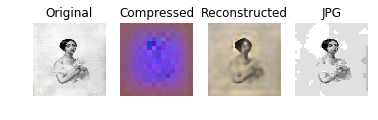

image18 reconstruction PSNR: 8.744602933383433
image18 jpeg PSNR: 20.553869578810577
(256, 256, 3)
(16, 16, 3)
(256, 256, 3)
(256, 256, 3)


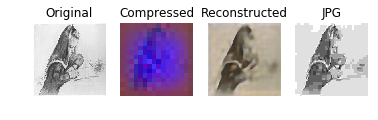

image19 reconstruction PSNR: 9.10201564056726
image19 jpeg PSNR: 18.378430667507494

Average reconstruction PSNR: 10.150929754586837
Average JPEG PSNR: 17.318882137688178



In [9]:
visualize(museum_loader,model100,"results/museum/100",100)
all_images = [[],[],[],[]]
visualize(museum_loader,model50,"results/museum/50",95)
all_images = [[],[],[],[]]
visualize(museum_loader256,model16.module,"results/museum/16",1)
